In [1]:
%tensorflow_version 2.x

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import load_model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! rm -rf test; mkdir test
! unzip -q '/content/drive/My Drive/Facial Expression/Facial_Expression/test-private.zip' -d test

In [5]:
def get_datagen(dataset):
    return ImageDataGenerator().flow_from_directory(
              dataset,
              target_size=(48,48),
              color_mode='grayscale',
              shuffle = True,
              class_mode='categorical',
              batch_size=32)

In [6]:
from skimage import io, transform

X_test_gen    = get_datagen('/content/test')

X_test = np.zeros((len(X_test_gen.filepaths), 48, 48, 1))
Y_test = np.zeros((len(X_test_gen.filepaths), 7))
for i in range(0,len(X_test_gen.filepaths)):
  x = io.imread(X_test_gen.filepaths[i], as_gray=True)
  X_test[i,:] = transform.resize(x, (48,48,1))
  Y_test[i,X_test_gen.classes[i]] = 1

Found 3589 images belonging to 7 classes.


In [7]:
model = load_model('/content/drive/My Drive/Facial Expression/Facial_Expression/models/webcam-SGD_LR_0.01000-EPOCHS_100-BS_128-DROPOUT_0.35test_acc_0.698.h5')

In [8]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = Y_test.argmax(axis=1)

In [9]:
incorrect = np.count_nonzero(y_pred-y_true)
print("Accuracy on test images: {:.2%}".format(1.0 - incorrect/len(y_true)))

Accuracy on test images: 65.20%


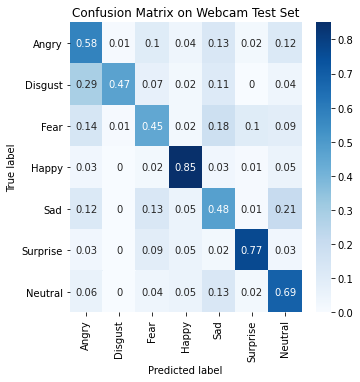

In [10]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

cmat_df_test=pd.DataFrame(
  confusion_matrix(y_true, y_pred, normalize='true').round(2),
  index=emotions.values(), 
  columns=emotions.values()
  )

plt.figure(figsize=(5,5))
heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix on Webcam Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [12]:
for i in range(0, len(y_pred)):
  if emotions[y_true[i]] == 'Happy' and emotions[y_pred[i]] == 'Happy':
      print(i)

1074
1075
1076
1077
1078
1081
1082
1083
1084
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1101
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1119
1123
1124
1125
1126
1127
1128
1129
1130
1132
1133
1134
1136
1137
1138
1139
1140
1141
1142
1143
1145
1147
1149
1150
1152
1153
1154
1155
1156
1160
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1177
1178
1180
1181
1182
1183
1184
1185
1187
1188
1189
1190
1191
1193
1194
1195
1196
1197
1198
1200
1201
1202
1204
1207
1209
1210
1211
1212
1213
1214
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1229
1230
1231
1232
1233
1234
1235
1236
1237
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1250
1252
1253
1254
1255
1256
1257
1259
1260
1261
1263
1264
1265
1266
1267
1268
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311


Error Analysis


3 happy/happy-035801.png
[0.02 0.   0.02 0.96 0.   0.   0.  ]


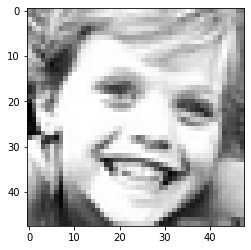

<Figure size 432x288 with 0 Axes>

In [13]:
i=1933

print(X_test_gen.filenames[i])
plt.imshow(X_test[i].reshape(48,48),cmap='gray')
plt.figure()
print(y_pred_probs[i].round(2))

3 happy/happy-035635.png
[0.   0.   0.   0.95 0.   0.   0.05]


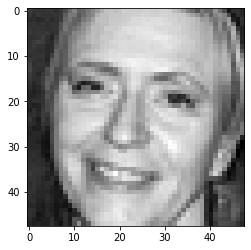

<Figure size 432x288 with 0 Axes>

In [14]:
i=1901

print(X_test_gen.filenames[i])
plt.imshow(X_test[i].reshape(48,48),cmap='gray')
plt.figure()
print(y_pred_probs[i].round(2))

In [15]:
def iter_occlusion(image, size=8):
    occlusion = np.full((size * 5, size * 5, 1), [0.5], np.float32)
    occlusion_center = np.full((size, size, 1), [0.5], np.float32)
    occlusion_padding = size * 2

    # print('padding...')
    image_padded = np.pad(image, ( \
                        (occlusion_padding, occlusion_padding), (occlusion_padding, occlusion_padding), (0, 0) \
                        ), 'constant', constant_values = 0.0)

    for y in range(occlusion_padding, image.shape[0] + occlusion_padding, size):
        for x in range(occlusion_padding, image.shape[1] + occlusion_padding, size):
            tmp = image_padded.copy()

            tmp[y - occlusion_padding:y + occlusion_center.shape[0] + occlusion_padding, \
                x - occlusion_padding:x + occlusion_center.shape[1] + occlusion_padding] \
                = occlusion

            tmp[y:y + occlusion_center.shape[0], x:x + occlusion_center.shape[1]] = occlusion_center

            yield x - occlusion_padding, y - occlusion_padding, \
                  tmp[occlusion_padding:tmp.shape[0] - occlusion_padding, occlusion_padding:tmp.shape[1] - occlusion_padding]

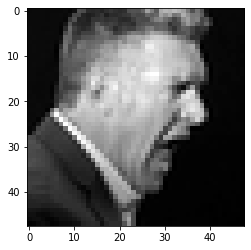

In [16]:
i = 126
data = X_test[i]
correct_class = np.argmax(Y_test[i])

# input tensor for model.predict
inp = data.reshape(1,48,48,1)
# image data for matplotlib's imshow
img = data.reshape(48,48)
# occlusion
img_size = img.shape[0]
occlusion_size = 4
_ = plt.imshow(img,cmap='gray')

In [17]:
print('occluding...')

heatmap = np.zeros((img_size, img_size), np.float32)
class_pixels = np.zeros((img_size, img_size), np.int16)

from collections import defaultdict
counters = defaultdict(int)

for n, (x, y, img_float) in enumerate(iter_occlusion(data, size=occlusion_size)):   
    X = img_float.reshape(1,48,48,1)
    out = model.predict(X)
    print('#{}: {} @ {} (correct class: {})'.format(n, np.argmax(out), np.amax(out), out[0][correct_class]))
    #print('x {} - {} | y {} - {}'.format(x, x + occlusion_size, y, y + occlusion_size))

    heatmap[y:y + occlusion_size, x:x + occlusion_size] = out[0][correct_class]
    class_pixels[y:y + occlusion_size, x:x + occlusion_size] = np.argmax(out)
    counters[np.argmax(out)] += 1

pred = model.predict(inp)
print('Correct class: {}'.format(correct_class))
print('Predicted class: {} (prob: {})'.format(np.argmax(pred), np.amax(out)))

print('Predictions:')
for class_id, count in counters.items():
    print('{}: {}'.format(class_id, count))

occluding...
#0: 0 @ 0.3735148012638092 (correct class: 0.3735148012638092)
#1: 4 @ 0.3451332151889801 (correct class: 0.32681986689567566)
#2: 0 @ 0.4082679748535156 (correct class: 0.4082679748535156)
#3: 4 @ 0.3880809247493744 (correct class: 0.31141695380210876)
#4: 4 @ 0.5053123235702515 (correct class: 0.20059522986412048)
#5: 4 @ 0.43291881680488586 (correct class: 0.1864469349384308)
#6: 4 @ 0.4058285355567932 (correct class: 0.16585759818553925)
#7: 4 @ 0.3981376886367798 (correct class: 0.17626327276229858)
#8: 6 @ 0.3527320325374603 (correct class: 0.21658334136009216)
#9: 0 @ 0.44636985659599304 (correct class: 0.44636985659599304)
#10: 0 @ 0.4446573257446289 (correct class: 0.4446573257446289)
#11: 0 @ 0.4087112545967102 (correct class: 0.4087112545967102)
#12: 4 @ 0.3999977111816406 (correct class: 0.2792881429195404)
#13: 4 @ 0.3354240357875824 (correct class: 0.2579541802406311)
#14: 4 @ 0.341096431016922 (correct class: 0.2824125289916992)
#15: 4 @ 0.3558351695537567 (

In [18]:
# Reverse heatmap so that red means important, blue means not
heatmap=1-heatmap

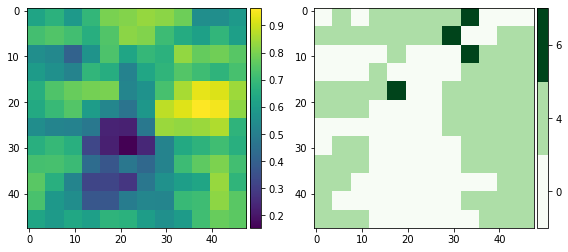

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import BoundaryNorm
from matplotlib.colorbar import ColorbarBase
from matplotlib import cm

fig = plt.figure(figsize=(8, 8))

ax1 = plt.subplot(1, 2, 1, aspect='equal')
hm = ax1.imshow(heatmap)

ax2 = plt.subplot(1, 2, 2, aspect='equal')


vals = np.unique(class_pixels).tolist()
bounds = vals + [vals[-1] + 1]  # add an extra item for cosmetic reasons

custom = cm.get_cmap('Greens', len(bounds)) # discrete colors

norm = BoundaryNorm(bounds, custom.N)

cp = ax2.imshow(class_pixels, norm=norm, cmap=custom)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar1 = plt.colorbar(hm, cax=cax1)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = ColorbarBase(cax2, cmap=custom, norm=norm,
                         # place the ticks at the average value between two entries
                         # e.g. [280, 300] -> 290
                         # so that they're centered on the colorbar
                         ticks=[(a + b) / 2.0 for a, b in zip(bounds[::], bounds[1::])],
                         boundaries=bounds, spacing='uniform', orientation='vertical')

cbar2.ax.set_yticklabels([n for n in np.unique(class_pixels)])

fig.tight_layout()

plt.show()

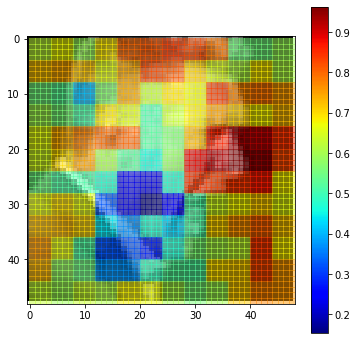

In [20]:
import cv2

plt.figure(figsize=(6, 6))

plt.imshow(img, cmap=cm.gray)
plt.pcolormesh(heatmap, cmap=plt.cm.jet, alpha=0.50)
plt.colorbar().solids.set(alpha=1)

plt.show()

In [21]:
import cv2

for i in range(0, len(y_pred)):
  if emotions[y_true[i]] == 'Happy' and emotions[y_pred[i]] == 'Happy':
    single_example = X_test[i]
    label = 3

    LAST_LAYER = "conv3"
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(LAST_LAYER).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(single_example.reshape(1,48,48,1))
        loss = preds[:,label]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = np.ones(output.shape[0: 2], dtype = np.float32)
    for i, w in enumerate(weights):
        cam += w * output[:, :, i]
    cam = cv2.resize(cam.numpy(), (48, 48))
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

    plt.imshow(single_example.reshape(48,48),cmap='gray')
    plt.imshow(cam,cmap='gray',alpha=0.5)
    plt.figure()

Output hidden; open in https://colab.research.google.com to view.

NameError: ignored

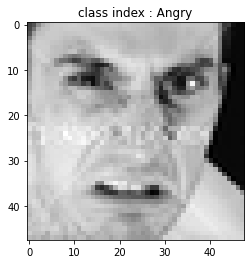

In [24]:
y_test = Y_test.argmax(axis=1)

# Select an image to show the saliency map on
indx=102
plt.title(label = "class index : {}".format(emotions[y_test[indx]]))
plt.imshow(X_test[indx].reshape(48,48),cmap='gray')
target_image = X_test[indx].reshape(1,48,48,1)

weights = model.weights[-2][:,y_test[indx]]
#output_conv4_model = Model(inputs=model.input, outputs=model.get_layer("conv3").output)
#layer_feature_maps = output_conv4_model.predict(target_image)

#TODO: vectorize
cam = 0
for k in range(layer_feature_maps.shape[-1]): 
     cam += weights[k]*layer_feature_maps[:,:,:,k]


cam = np.reshape(cam,[12,12,1])
#plt.imshow(np.resize(cam,(48,48)))
cam_resized= tf.image.resize(cam,[48,48])
plt.imshow(target_image.reshape(48,48),cmap='gray')
plt.imshow(cam_resized.numpy().reshape(48,48),alpha=0.4)